In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Configurar opção para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 100

In [ ]:
df = pd.read_csv('/content/audi.csv')
df2 = pd.read_csv('/content/train.csv')

In [ ]:
# Contar o número de ocorrências de cada modelo
model_counts = df['model'].value_counts()

# Filtrar os modelos que têm pelo menos 10 ocorrências
model_counts = model_counts[model_counts >= 10]

# Filtrar o DataFrame original para manter apenas os modelos que têm pelo menos 10 ocorrências
df = df[df['model'].isin(model_counts.index)]

In [ ]:
# Dividindo a base em conjunto de treinamento e teste
data_train, data_test = train_test_split(df, test_size=0.35, random_state=42)


# Pre-Processamento

##BASE DE CASAS

###Dados Nulos


Existem várias opções para lidar com valores nulos em um conjunto de dados. Aqui estão algumas das opções mais comuns:

- **Remoção de linhas ou colunas**: Se os valores nulos forem relativamente poucos e não afetarem significativamente a integridade dos dados, você pode optar por remover as linhas ou colunas que contenham valores nulos.

- **Preenchimento com um valor constante**: Você pode preencher os valores nulos com um valor constante, como zero, a média, a mediana ou o valor mais frequente da coluna.

- **Imputação com modelos estatísticos**: Você pode usar modelos estatísticos mais avançados, como regressão linear ou modelos de aprendizado de máquina, para prever os valores nulos com base nas outras variáveis do conjunto de dados.

- **Preenchimento condicional**: Você pode preencher os valores nulos com base em condições específicas ou regras de negócios. Por exemplo, você pode preencher os valores nulos em uma coluna com base nos valores de outra coluna.

A escolha da técnica de preenchimento de dados nulos depende do contexto do seu problema, da natureza dos dados e do impacto potencial nas análises ou modelos subsequentes.

In [ ]:
# Calculando o número de valores nulos em cada coluna
null_counts = df2.isnull().sum()

# Calculando a porcentagem de valores nulos em cada coluna
null_percentages = (null_counts / len(df2)) * 100
null_percentages

index                    0.000000
ClasseImovel             0.000000
ClasseZona               0.000000
Fachada                 17.636986
TamanhoLote              0.000000
Rua                      0.000000
Beco                    94.178082
FormaProp                0.000000
PlanoProp                0.000000
Servicos                 0.000000
ConfigLote               0.000000
InclinacaoLote           0.000000
Bairro                   0.000000
Estrada1                 0.000000
Estrada2                 0.000000
TipoHabitacao            0.000000
EstiloHabitacao          0.000000
Qualidade                0.000000
Condicao                 0.000000
AnoConstrucao            0.000000
AnoReforma               0.000000
TipoTelhado              0.000000
MaterialTelhado          0.000000
Exterior1                0.000000
Exterior2                0.000000
TipoAlvenaria           59.931507
AreaAlvenaria            0.684932
QualidadeCobertura       0.000000
CondicaoExterna          0.000000
TipoFundacao  

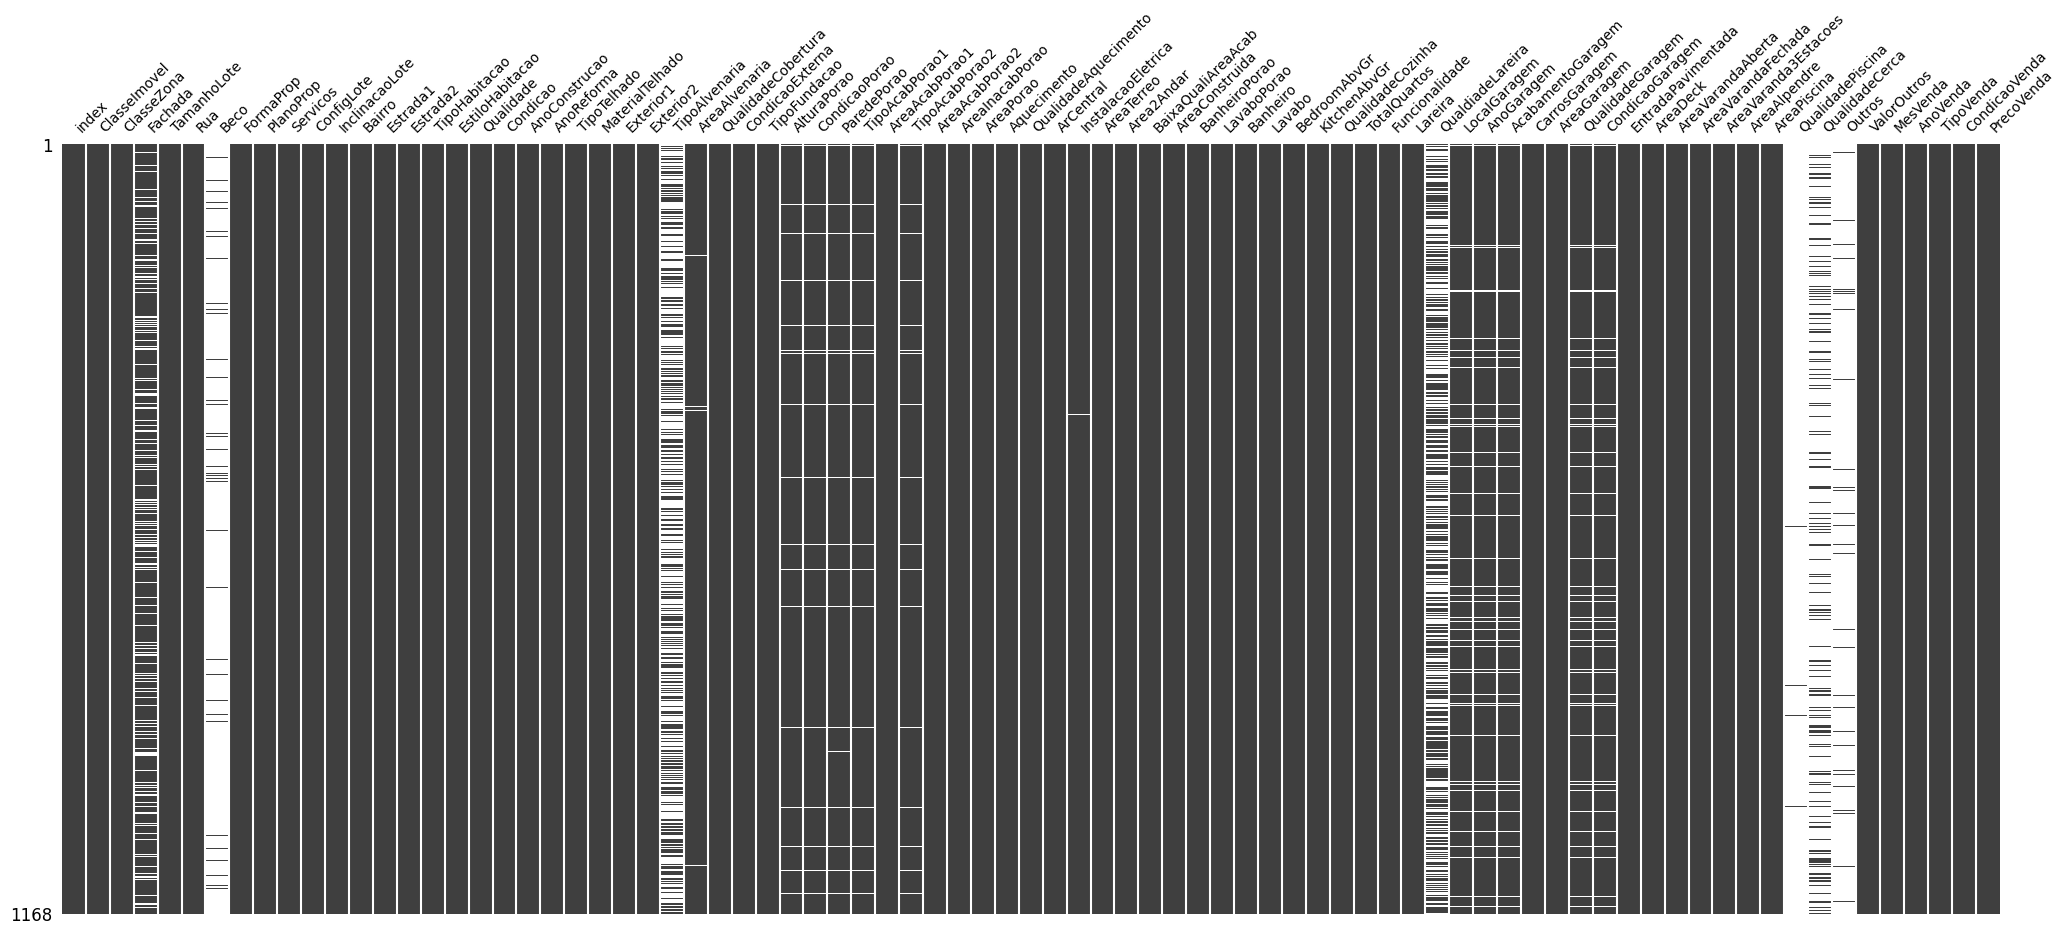

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
# Plote a matriz de nulos com os rótulos das colunas na horizontal
msno.matrix(df2, labels=True, fontsize=10, sparkline=False )
plt.show()


#####NUMERICA
**AnoGaragem**

In [ ]:
#visualizando quantidades de nulos e nao nulos
df2.AnoGaragem.value_counts(dropna=False)

AnoGaragem
NaN       60
2006.0    50
2005.0    49
2004.0    40
2007.0    40
2003.0    39
1998.0    29
1977.0    27
2000.0    26
2008.0    23
1976.0    23
1999.0    21
2002.0    20
2001.0    19
1968.0    19
1993.0    19
1950.0    19
1996.0    18
1962.0    18
1958.0    18
1960.0    18
2009.0    18
1966.0    17
1978.0    17
1954.0    17
1964.0    17
1965.0    16
1995.0    16
1970.0    16
1994.0    15
1957.0    14
1959.0    14
1997.0    14
1974.0    14
1972.0    13
1963.0    13
1973.0    12
1992.0    11
1956.0    11
1967.0    11
1980.0    11
1979.0    10
1969.0    10
1925.0    10
1940.0    10
1920.0    10
1961.0    10
1990.0    10
1955.0    10
1989.0    10
1988.0     9
1987.0     9
1953.0     9
1985.0     9
1948.0     9
1941.0     8
1984.0     8
1971.0     8
1981.0     7
1949.0     7
1930.0     7
1991.0     7
1939.0     6
1986.0     6
1916.0     5
1936.0     5
1951.0     5
1975.0     5
1983.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1922.0     4
1945.0     3
1

In [ ]:
# Filtrar as linhas onde 'TipoAlvenaria' é nulo
nulos_LogalGaragem = df2[df2['LocalGaragem'].isnull()]

# Filtrar as linhas onde 'AnoGaragem' é nulo
nulos_ano_garagem = df2[df2['AnoGaragem'].isnull()]

# Verificar se os índices das linhas nulas de 'AnoGaragem' estão presentes nas linhas nulas de 'TipoAlvenaria'
linhas_nulas_comuns = nulos_ano_garagem.index.intersection(nulos_LogalGaragem.index)

# Se houverem linhas em comum, significa que elas têm valores nulos em ambas as colunas
if len(linhas_nulas_comuns) > 0:
    print("Existem linhas com valores nulos em ambas as colunas.")
    print("Índices das linhas com valores nulos em ambas as colunas:", linhas_nulas_comuns)
    print('quantidade',len(linhas_nulas_comuns))
else:
    print("Não há linhas com valores nulos em ambas as colunas.")

Existem linhas com valores nulos em ambas as colunas.
Índices das linhas com valores nulos em ambas as colunas: Index([   2,   33,   77,   83,   92,  153,  156,  222,  223,  268,  283,  291,
        295,  313,  323,  339,  395,  403,  416,  425,  428,  467,  489,  491,
        529,  530,  553,  563,  564,  600,  626,  628,  652,  671,  673,  684,
        693,  718,  724,  736,  753,  762,  787,  797,  801,  835,  846,  848,
        851,  897,  914,  967,  971,  980, 1012, 1042, 1065, 1082, 1141, 1156],
      dtype='int64')
quantidade 60


In [ ]:
#visualizando o ano de constução das casas que não tem garagem
df2.AnoConstrucao.loc[[914,295,395,403]]

914    1941
295    1972
395    1900
403    1916
Name: AnoConstrucao, dtype: int64

In [ ]:
#exemplo de preenchimento das casas que não tem garagem.
df2['AnoConstrucao'].fillna(0, inplace=True)
df2['LocalGaragem'].fillna(0, inplace=True)

#####Categorica
**Outros**

In [ ]:
#visualizando quantidades de nulos e nao nulos
df2.Outros.value_counts(dropna=False)

Outros
NaN     1130
Shed      36
Gar2       1
TenC       1
Name: count, dtype: int64

In [ ]:
# Preencher os valores nulos na coluna 'TipoAlvenaria' com 'BrkFace'
df2['Outros'].fillna('NENHUM', inplace=True)

**TipoAlvenaria**

In [ ]:
df2.TipoAlvenaria.value_counts(dropna=False)

TipoAlvenaria
NaN        700
BrkFace    356
Stone      100
BrkCmn      12
Name: count, dtype: int64

Tipo de alvenaria representa o material que foi usado na construção da casa, o valor mais frequente é **None = nenhum** podemos presupor que Talvez ter nenhum material na alvenaria, não façã sentido e tentar imputar algum valor aqui como por exemplo o valor mais frequente que não seja nulo. Em situações normais você entenderia com a equipe de negocio se faz sentido ou não esta abordagem, porem aqui tem que ser tudo na base dos testes.

In [ ]:
# Preencher os valores nulos na coluna 'TipoAlvenaria' com 'BrkFace'
df2['TipoAlvenaria'].fillna('BrkFace', inplace=True)

###Outliers
Outliers são pontos de dados que se desviam significativamente do restante dos dados em um conjunto. Eles podem ser causados por erros de medição, falhas no processo de coleta de dados ou podem representar fenômenos genuínos, mas raros. Lidar com outliers é importante porque eles podem distorcer a análise estatística e prejudicar a precisão dos modelos de machine learning.

Algumas opções comuns para lidar com outliers:

- **Remoção de outliers**: A remoção dos outliers do conjunto de dados é uma abordagem simples, mas pode ser arriscada, especialmente se os outliers forem genuínos. Os outliers podem ser removidos com base em critérios estatísticos, como a distância interquartil (IQR) ou a média mais/menos um desvio padrão. No entanto, a remoção de outliers deve ser feita com cuidado e baseada no conhecimento do domínio para garantir que informações valiosas não sejam perdidas.

- **Transformação dos dados**: Transformar os dados pode ajudar a reduzir o impacto dos outliers. Por exemplo, aplicar uma transformação logarítmica ou uma transformação Box-Cox pode reduzir a escala dos valores extremos e tornar a distribuição dos dados mais normal. Isso pode ser útil para algoritmos sensíveis à escala, como regressão linear.

- **Winsorização**: A winsorização substitui os valores dos outliers por valores próximos aos limites do intervalo interquartil (IQR). Por exemplo, em vez de remover os outliers, podemos substituí-los pelo valor máximo ou mínimo dentro de um intervalo específico. Isso preserva a forma geral dos dados enquanto reduz o efeito dos outliers.

- **Utilização de algoritmos robustos**: Alguns algoritmos de machine learning são naturalmente robustos a outliers. Por exemplo, árvores de decisão e métodos baseados em árvores, como florestas aleatórias e gradient boosting, podem lidar bem com outliers devido à sua natureza não paramétrica.

In [ ]:
df2.describe(percentiles=[0.25,0.50,0.75,0.95, 0.99])

,index,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
count,1168.000000,1168.000000,962.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1108.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,726.965753,56.596747,70.434511,10582.849315,6.110445,5.611301,1971.434075,1985.433219,102.290517,442.554795,48.879281,571.130137,1062.564212,1167.376712,344.33476,6.595890,1518.307363,0.430651,0.060788,1.568493,0.380137,2.869863,1.044521,6.518836,0.613870,1978.775271,1.779110,476.628425,95.038527,47.489726,20.405822,3.534247,15.773116,2.517123,37.409247,6.397260,2007.804795,182109.710616
std,420.260982,42.115208,24.365675,10354.795745,1.389381,1.119865,30.089226,20.459226,174.669734,458.630573,167.608554,444.985763,440.597519,390.297613,433.40615,52.355954,520.894579,0.522323,0.246108,0.544915,0.502964,0.821842,0.214482,1.606965,0.648547,24.499710,0.737658,210.690908,126.900623,65.313205,58.305225,28.376442,56.610766,38.889178,483.894119,2.707961,1.314833,76336.000861
min,0.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.00000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,358.750000,20.000000,60.000000,7639.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,801.500000,884.000000,0.00000,0.000000,1135.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130875.000000
50%,727.500000,50.000000,70.000000,9458.500000,6.000000,5.000000,1973.000000,1994.500000,0.000000,378.000000,0.000000,484.500000,992.000000,1088.000000,0.00000,0.000000,1472.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165500.000000
75%,1083.250000,70.000000,80.000000,11643.500000,7.000000,6.000000,2000.250000,2004.000000,165.250000,712.000000,0.000000,810.250000,1302.500000,1408.000000,739.00000,0.000000,1780.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215050.000000
95%,1388.650000,160.000000,107.000000,17190.050000,8.000000,8.000000,2007.000000,2007.000000,456.400000,1249.000000,416.850000,1486.550000,1744.600000,1836.000000,1128.65000,0.000000,2467.300000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.650000,2.000000,2007.000000,3.000000,852.650000,331.250000,175.650000,175.300000,0.000000,160.650000,0.000000,0.000000,11.000000,2010.000000,327300.000000
99%,1446.330000,190.000000,140.390000,37359.320000,9.330000,9.000000,2009.000000,2009.000000,766.820000,1583.890000,881.210000,1800.000000,2177.140000,2226.630000,1368.55000,375.290000,3083.320000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,986.960000,512.980000,282.990000,254.310000,168.000000,273.9900

#####Winsorização

In [ ]:
# Calcular o valor do 99º percentil da coluna 'AreaAlvenaria'
percentile_99 = df2['AreaAlvenaria'].quantile(0.99)

# Substituir os valores maiores que o 99º percentil pelo valor do 99º percentil
df2['AreaAlvenaria'] = df2['AreaAlvenaria'].apply(lambda x: percentile_99 if x > percentile_99 else x)

In [ ]:
df2.AreaAlvenaria.describe(percentiles=[0.25,0.50,0.75,0.95, 0.99])

count    1160.000000
mean      100.653310
std       167.049671
min         0.000000
25%         0.000000
50%         0.000000
75%       165.250000
95%       456.400000
99%       766.336200
max       766.820000
Name: AreaAlvenaria, dtype: float64

###################################################
###############################################
########################################

##BASE DE CARRO

###OneHotEncoder
Quando você possui **Features Categoricas** e deseja usar elas no seu modelo, é necessario aplicar o one-hot para convertê-las em um formato numérico que os algoritmos de aprendizado de máquina possam entender, você pode usar a classe `OneHotEncoder` da biblioteca scikit-learn ou `get_dummies` do proprio Pandas.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6923 entries, 3383 to 7270
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6923 non-null   object 
 1   year          6923 non-null   int64  
 2   price         6923 non-null   int64  
 3   transmission  6923 non-null   object 
 4   mileage       6923 non-null   int64  
 5   fuelType      6923 non-null   object 
 6   tax           6923 non-null   int64  
 7   mpg           6923 non-null   float64
 8   engineSize    6923 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 540.9+ KB


In [ ]:
data_train.model.value_counts()

model
 A3     1264
 Q3      897
 A4      893
 A1      890
 A5      595
 Q5      542
 Q2      523
 A6      480
 Q7      256
 TT      229
 A7       87
 A8       84
 Q8       46
 RS6      26
 RS3      21
 R8       21
 RS5      20
 RS4      17
 S3       13
 SQ5      11
 S4        8
Name: count, dtype: int64

temos modelos com apenas 1 caso isso pode ocasionar colunas que não são representadas em ambas as bases treino e teste por falta de ocorrencias ao aplicar o Encoding por isso vai ser feita a remoção desses modelos com menos de 10 ocorrencias, para facilitar irei jogar o trecho dessa remoção antes da divisão da base.

In [ ]:
data_train.transmission.value_counts()

transmission
Manual       2844
Semi-Auto    2317
Automatic    1762
Name: count, dtype: int64

In [ ]:
data_train.fuelType.value_counts()

fuelType
Diesel    3607
Petrol    3298
Hybrid      18
Name: count, dtype: int64

In [ ]:
# Usando get_dummies para codificar as features categóricas sem dropFirst
df_encoded_ = pd.get_dummies(data_train, columns=['model', 'transmission', 'fuelType'])

In [ ]:
# Usando get_dummies para codificar as features categóricas com dropFirst
df_train_encoded = pd.get_dummies(data_train, columns=['model', 'transmission', 'fuelType'], drop_first=True)

In [ ]:
#dataframe sem dropfirst
df_encoded_

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ S3,model_ S4,model_ SQ5,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
3383,2019,30870,14563,145,45.6,2.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
9409,2017,24490,39309,145,52.3,3.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
9471,2015,43990,28123,555,28.8,4.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
2997,2017,23671,24260,150,43.5,2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2571,2017,14795,34800,20,67.3,2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2017,47450,38513,300,39.2,4.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
5191,2017,13490,35543,145,53.3,1.4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
5390,2019,23766,9893,145,48.7,2.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
860,2020,20990,556,145,47.9,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


In [ ]:
#dataframe com dropfirst
df_train_encoded

,year,price,mileage,tax,mpg,engineSize,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ S3,model_ S4,model_ SQ5,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
3383,2019,30870,14563,145,45.6,2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9409,2017,24490,39309,145,52.3,3.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9471,2015,43990,28123,555,28.8,4.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2997,2017,23671,24260,150,43.5,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2571,2017,14795,34800,20,67.3,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2017,47450,38513,300,39.2,4.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5191,2017,13490,35543,145,53.3,1.4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
5390,2019,23766,9893,145,48.7,2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
860,2020,20990,556,145,47.9,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


###Normalização ou Escalonamento

A normalização refere-se ao processo de ajustar os dados para que fiquem em uma escala específica ou sigam uma determinada distribuição, o que pode ser necessário para alguns algoritmos de aprendizado de máquina funcionarem de forma eficaz.

Existem diferentes técnicas de normalização, como o StandardScaler, MinMaxScaler e RobustScaler, que são utilizadas para diferentes propósitos:

- **StandardScaler**: Ele normaliza os dados subtraindo a média e dividindo pelo desvio padrão, resultando em dados com média zero e desvio padrão um. Isso torna os dados centrados em zero e com variância unitária.

- **MinMaxScaler**: Ele normaliza os dados dimensionando cada feature para um intervalo específico, geralmente entre 0 e 1. Isso é feito subtraindo o valor mínimo e dividindo pela diferença entre o máximo e o mínimo.

- **RobustScaler**: Semelhante ao StandardScaler, mas usa estatísticas robustas para lidar com outliers. Ele subtrai a mediana e divide pelos quartis.

**Algoritimos baseados em arvores não exigem normalização**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


# Selecionando apenas as variáveis numéricas
numeric_cols = ['year','mileage', 'tax', 'mpg', 'engineSize']
data_train_numeric = data_train[numeric_cols]

# Instanciando os scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# Aplicando os scalers
data_train_standardized = scaler_standard.fit_transform(data_train_numeric)
data_train_minmax = scaler_minmax.fit_transform(data_train_numeric)
data_train_robust = scaler_robust.fit_transform(data_train_numeric)

# Convertendo os resultados de volta para DataFrame pandas
data_train_standardized = pd.DataFrame(data_train_standardized, columns=numeric_cols, index=data_train_numeric.index)
data_train_minmax = pd.DataFrame(data_train_minmax, columns=numeric_cols, index=data_train_numeric.index)
data_train_robust = pd.DataFrame(data_train_robust, columns=numeric_cols, index=data_train_numeric.index)

In [ ]:
data_train_standardized

,year,mileage,tax,mpg,engineSize
3383,0.877674,-0.435926,0.278919,-0.404885,0.117305
9409,-0.044910,0.617937,0.278919,0.111771,1.773988
9471,-0.967494,0.141556,6.356231,-1.700378,3.430671
2997,-0.044910,-0.022958,0.353032,-0.566821,0.117305
2571,-0.044910,0.425911,-1.573920,1.268461,0.117305
...,...,...,...,...,...
5734,-0.044910,0.584037,2.576439,-0.898406,3.430671
5191,-0.044910,0.457553,0.278919,0.188883,-0.876704
5390,0.877674,-0.634809,0.278919,-0.165835,0.117305
860,1.338966,-1.032446,0.278919,-0.227525,-1.539377


In [ ]:
data_train_minmax

,year,mileage,tax,mpg,engineSize
3383,0.956522,0.045072,0.250000,0.157615,0.317460
9409,0.869565,0.121686,0.250000,0.197166,0.476190
9471,0.782609,0.087054,0.956897,0.058442,0.634921
2997,0.869565,0.075094,0.258621,0.145218,0.317460
2571,0.869565,0.107726,0.034483,0.285714,0.317460
...,...,...,...,...,...
5734,0.869565,0.119222,0.517241,0.119835,0.634921
5191,0.869565,0.110026,0.250000,0.203070,0.222222
5390,0.956522,0.030613,0.250000,0.175915,0.317460
860,1.000000,0.001706,0.250000,0.171192,0.158730


In [ ]:
data_train_robust

,year,mileage,tax,mpg,engineSize
3383,0.666667,-0.151479,0.00,-0.222222,0.0
9409,0.000000,0.656910,0.00,0.150000,2.0
9471,-0.666667,0.291492,20.50,-1.155556,4.0
2997,0.000000,0.165297,0.25,-0.338889,0.0
2571,0.000000,0.509612,-6.25,0.983333,0.0
...,...,...,...,...,...
5734,0.000000,0.630907,7.75,-0.577778,4.0
5191,0.000000,0.533884,0.00,0.205556,-1.2
5390,0.666667,-0.304036,0.00,-0.050000,0.0
860,1.000000,-0.609052,0.00,-0.094444,-2.0


###Distribuições Diferentes:
Quando falamos sobre "distribuições diferentes" em relação às variáveis normalizadas, estamos nos referindo às distribuições das variáveis após a normalização. Idealmente, após a normalização, gostaríamos que todas as variáveis tivessem distribuições semelhantes. No entanto, em algumas situações, pode acontecer de algumas variáveis terem distribuições muito diferentes das outras. Por exemplo, uma variável pode ter uma média muito diferente das outras, ou sua variabilidade pode ser muito maior. Isso pode ser observado visualmente por meio de histogramas ou outros gráficos de distribuição.
Se as distribuições das variáveis normalizadas forem muito diferentes umas das outras, isso pode afetar negativamente o desempenho do modelo, especialmente para algoritmos sensíveis à escala. Portanto, pode ser necessário ajustar a normalização ou considerar outras técnicas de pré-processamento, como a transformação logarítmica, para garantir que as variáveis tenham distribuições mais semelhantes.

In [ ]:
data_train_standardized.year.mean(),data_train_standardized.tax.mean()

(3.761678724302099e-14, 1.0776684566634482e-16)

<Axes: >

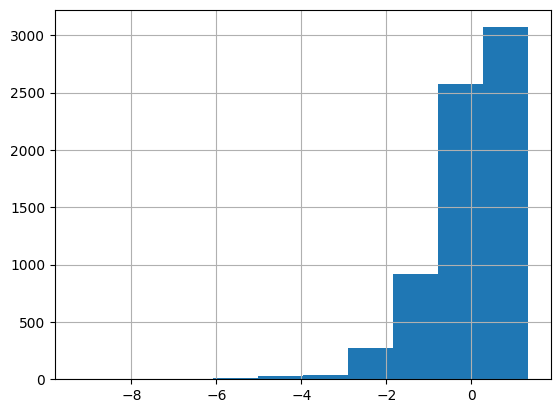

In [ ]:
data_train_standardized.year.hist()

<Axes: >

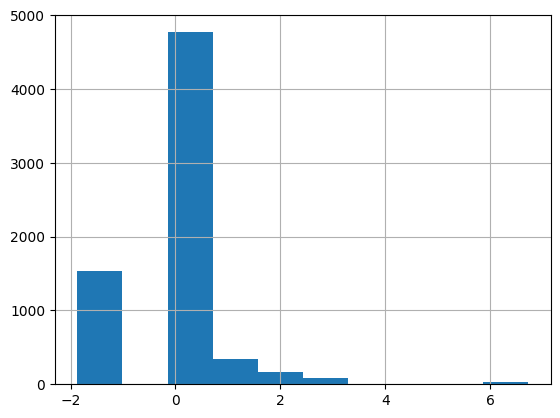

In [ ]:
data_train_standardized.tax.hist()

(<Axes: >, <Axes: >)

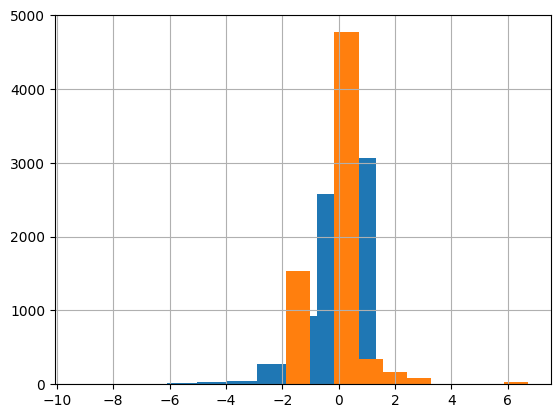

In [ ]:
data_train_standardized.year.hist(),data_train_standardized.tax.hist()


####Unindo o OnehotEnconding com a normalização

In [ ]:

# Lista das features numéricas não normalizadas
numeric_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Substituir as features não normalizadas pelas correspondentes features normalizadas
for col in numeric_cols:
    df_train_encoded[col] = data_train_standardized[col]


In [ ]:
df_train_encoded

,year,price,mileage,tax,mpg,engineSize,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ S3,model_ S4,model_ SQ5,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
3383,0.877674,30870,-0.435926,0.278919,-0.404885,0.117305,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9409,-0.044910,24490,0.617937,0.278919,0.111771,1.773988,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9471,-0.967494,43990,0.141556,6.356231,-1.700378,3.430671,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2997,-0.044910,23671,-0.022958,0.353032,-0.566821,0.117305,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2571,-0.044910,14795,0.425911,-1.573920,1.268461,0.117305,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.044910,47450,0.584037,2.576439,-0.898406,3.430671,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5191,-0.044910,13490,0.457553,0.278919,0.188883,-0.876704,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
5390,0.877674,23766,-0.634809,0.278919,-0.165835,0.117305,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
860,1.338966,20990,-1.032446,0.278919,-0.227525,-1.539377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [ ]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6923 entries, 3383 to 7270
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6923 non-null   float64
 1   price                   6923 non-null   int64  
 2   mileage                 6923 non-null   float64
 3   tax                     6923 non-null   float64
 4   mpg                     6923 non-null   float64
 5   engineSize              6923 non-null   float64
 6   model_ A3               6923 non-null   bool   
 7   model_ A4               6923 non-null   bool   
 8   model_ A5               6923 non-null   bool   
 9   model_ A6               6923 non-null   bool   
 10  model_ A7               6923 non-null   bool   
 11  model_ A8               6923 non-null   bool   
 12  model_ Q2               6923 non-null   bool   
 13  model_ Q3               6923 non-null   bool   
 14  model_ Q5               6923 non-null   bo

##Preparando a base de teste

 É crucial garantir que as transformações aplicadas aos dados de teste sejam consistentes com aquelas aplicadas aos dados de treinamento. Isso é importante para evitar vazamento de informações e garantir que o modelo esteja sendo avaliado de maneira justa e realista.

 -  **Normalização ou Padronização**: Use os mesmos parâmetros (média e desvio padrão) calculados a partir dos dados de treinamento para aplicar a transformação à base de teste. Isso garante que a escala dos dados de teste seja consistente com a dos dados de treinamento, sem vazar informações sobre os dados de teste durante o processo de treinamento.

 - **Tratamento de Outliers**: Use os mesmos critérios (por exemplo, limite superior e inferior definidos a partir dos dados de treinamento) para tratar outliers na base de teste. Isso garante que os outliers na base de teste sejam tratados da mesma forma que os do conjunto de treinamento, sem vazar informações sobre os dados de teste durante o treinamento do modelo.

 Em todos esses casos, a ideia é aplicar as mesmas transformações ou critérios de tratamento aos dados de teste que foram aplicados aos dados de treinamento. Isso é importante para garantir que o modelo seja avaliado de forma justa e realista, sem vazar informações sobre os dados de teste durante o processo de treinamento.






####encoding

In [ ]:
# Usando get_dummies para codificar as features categóricas com dropFirst
df_test_encoded = pd.get_dummies(data_test, columns=['model', 'transmission', 'fuelType'], drop_first=True)

####Normalização


In [ ]:
# Selecionando apenas as variáveis numéricas do conjunto de teste
data_test_numeric = data_test[numeric_cols]

# Aplicando as transformações usando os scalers já ajustados nos dados de treinamento
data_test_standardized = scaler_standard.transform(data_test_numeric)

# Convertendo os resultados de volta para DataFrame pandas
data_test_standardized = pd.DataFrame(data_test_standardized, columns=numeric_cols, index=data_test_numeric.index)

#### Unindo o OneHotEnconding com a normalização

In [ ]:
# Substituir as features não normalizadas pelas correspondentes features normalizadas
for col in numeric_cols:
    df_test_encoded[col] = data_test_standardized[col]

In [ ]:
df_test_encoded

,year,price,mileage,tax,mpg,engineSize,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ S3,model_ S4,model_ SQ5,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
3065,-1.428786,13549,0.572411,0.278919,0.265996,0.117305,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7331,0.877674,25490,-0.621735,0.353032,-0.767314,-0.711036,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4301,-0.506202,17950,0.256286,-1.425693,0.921454,0.117305,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6501,0.416382,30990,0.245725,0.278919,-0.034744,1.773988,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9269,-0.967494,11000,2.520776,-1.425693,0.813496,0.117305,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,-0.044910,12985,0.070308,-1.573920,1.522933,-0.545368,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
877,1.338966,39888,-0.980958,0.278919,-1.530730,0.117305,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
8663,-0.044910,21450,0.216723,0.278919,0.813496,0.117305,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,0.877674,27985,-1.026824,0.278919,-0.227525,0.117305,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3728 entries, 3065 to 10395
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    3728 non-null   float64
 1   price                   3728 non-null   int64  
 2   mileage                 3728 non-null   float64
 3   tax                     3728 non-null   float64
 4   mpg                     3728 non-null   float64
 5   engineSize              3728 non-null   float64
 6   model_ A3               3728 non-null   bool   
 7   model_ A4               3728 non-null   bool   
 8   model_ A5               3728 non-null   bool   
 9   model_ A6               3728 non-null   bool   
 10  model_ A7               3728 non-null   bool   
 11  model_ A8               3728 non-null   bool   
 12  model_ Q2               3728 non-null   bool   
 13  model_ Q3               3728 non-null   bool   
 14  model_ Q5               3728 non-null   b

## Preparando os dados pro modelo

In [ ]:
# Separar os dados de treinamento
X_train = df_train_encoded.drop(columns=['price'])  # Recursos
y_train = df_train_encoded['price']                # Variável resposta

# Separar os dados de teste
X_test = df_test_encoded.drop(columns=['price'])    # Recursos
y_test = df_test_encoded['price']                  # Variável resposta


#Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import numpy as np

In [ ]:
# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


# Imprimir os resultados com formatação
print("Métricas de Avaliação do Modelo:")
print(f"Erro Quadrático Médio (MSE): {mse:.5f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.5f}")
print(f"Erro Absoluto Médio (MAE): {mae:.5f}")



Métricas de Avaliação do Modelo:
Erro Quadrático Médio (MSE): 14831111.50830
Raiz do Erro Quadrático Médio (RMSE): 3851.11822
Erro Absoluto Médio (MAE): 2576.46299


In [ ]:

y_pred


array([13724.95541837, 25619.43622239, 17697.24136605, ...,
       20195.25773881, 30019.82748903, 35156.82223866])

In [ ]:
y_test

3065     13549
7331     25490
4301     17950
6501     30990
9269     11000
         ...  
3883     12985
877      39888
8663     21450
196      27985
10395    31000
Name: price, Length: 3728, dtype: int64

In [ ]:
# Criar um DataFrame com os índices de y_test como "id" e os valores de y_pred como "price"
df_sub = pd.DataFrame({'id': y_test.index, 'price': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_sub.to_csv('predictions.csv', index=False)


In [ ]:
df_sub

,id,price
0,3065,-0.781809
1,7331,0.243030
2,4301,-0.439553
3,6501,0.566104
4,9269,-0.827071
...,...,...
3723,3883,-0.608504
3724,877,1.036449
3725,8663,-0.224322
3726,196,0.622172


In [ ]:
df_sub2 = pd.read_csv('/content/predictions.csv')
df_sub2

,id,price
0,3065,-0.781809
1,7331,0.243030
2,4301,-0.439553
3,6501,0.566104
4,9269,-0.827071
...,...,...
3723,3883,-0.608504
3724,877,1.036449
3725,8663,-0.224322
3726,196,0.622172


In [ ]:
sub_example_desafio = pd.read_csv('/content/submission_example.csv')
sub_example_desafio


,Id,PrecoVenda
0,1293,0
1,1306,0
2,721,0
3,345,0
4,39,0
...,...,...
287,408,0
288,1038,0
289,1221,0
290,1411,0
